# **SVM - Kernel comparison**

## Kernel interpretation

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles

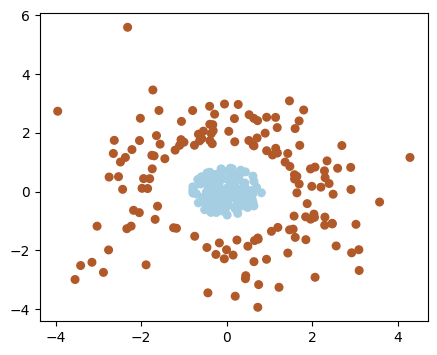

In [39]:
X, y = make_gaussian_quantiles(cov=2,
                                 n_samples = 300 , n_features = 2 ,
                                 n_classes = 2 , random_state = 1)

##Juntar los puntos o datos. en este caso los azules
X [ y == 0] =  X [ y== 0]* 0.5

_, ax = plt.subplots(figsize=(5,4))
ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='Paired')
##plt.scatter( _ , _ , _ , s=10, cmap=plt.cm.Paired)

In [40]:
## Pseudo dimensión
## Esto seria el kernel, toca hacerlo exponencial para poder ver como separariamos los grupos
Xk = X[:, 0]**2 + X[:, 1]**2
print(Xk.shape)

(300,)


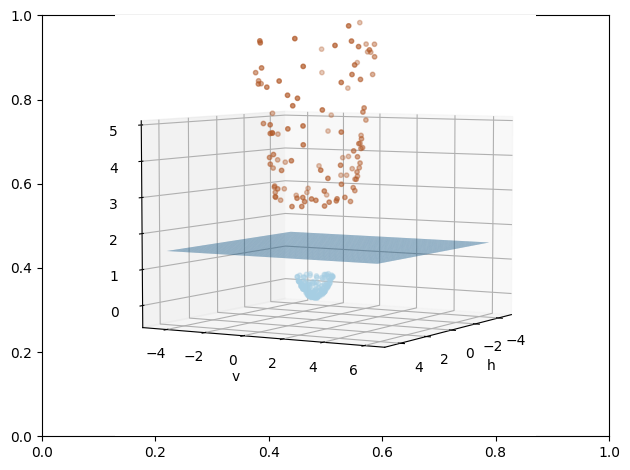

In [41]:
f, _ = plt.subplots()
ax= f.add_subplot(projection='3d')
##Proyección en view_unit, rotación, primer parametro de arriba/abajo para ver el plano, segundo tipo diagonal
ax.view_init(5, 30)
ax.scatter3D( X[:, 0] , X[:, 1] , Xk , c = y , s=10, cmap='Paired')

h_grid, v_grid = np.meshgrid(np.linspace(-4.5,4.5, 100), np.linspace(-4.5, 6.2,100) )
z_grid= np.ones(h_grid.shape)*1.5


ax.plot_surface(h_grid, v_grid, z_grid, alpha=0.5)
ax.set_xlabel('h'), ax.set_ylabel('v')
##Agregamos otro fragmento de código para ahora si separar los datos.
ax.set_zlim(-0.5, 5)

## Dibujar la línea de separación
##Aquí:
plt.tight_layout()

In [6]:
# Sve all figs
#crear carpeta con python
import os

os.makedirs('imgs_kernel/', exist_ok=True)

#el 10 es de saltos, 10 saltos de 10 angulos
for angle in range (0, 91, 2):
  f, _ = plt.subplots()
  ax= f.add_subplot(projection='3d')
  ax.view_init(angle,30)
  ax.scatter3D( X[:, 0] , X[:, 1] , Xk , c = y , s=30, cmap='Paired')
  ax.plot_surface(h_grid, v_grid, z_grid, alpha=0.5)
  ax.set_xlabel('h'), ax.set_ylabel('v'), ax.set_zlabel('k')
  ax.set_zlim(0, 5)
  plt.savefig('imgs_kernel/{0}.png'.format(angle), dpi=200)

  #Elimina el eje clf y el close cierra como tal, esto para que no se sobreescriba
  plt.clf(), plt.close()




In [42]:
import os
from PIL import Image
#Libreria para organizar los elementos de una lista
from natsort import natsorted, ns

images = []
#Creamos libreria con los archivos
files_ = natsorted(os.listdir('/content/imgs_kernel'), alg  = ns.PATH)
#Cuantos archivos o imagenes tenemos
print(len(files_))

# Save a gif
for img in files_:
  image = Image.open('imgs_kernel/{0}'.format(img))
  images.append(image)

#Append_image: lista de las imagenes
image.save("kernel_.gif", save_all=True, append_images=images, duration=200, loop=0)

46


## SVM

In [43]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.datasets import make_classification
import sys
sys.path.append('/content/drive/MyDrive/Machine/machine_learning')
from Tools.utils import plot_decision_boundary

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(200, 200) (200, 200) (200, 200)


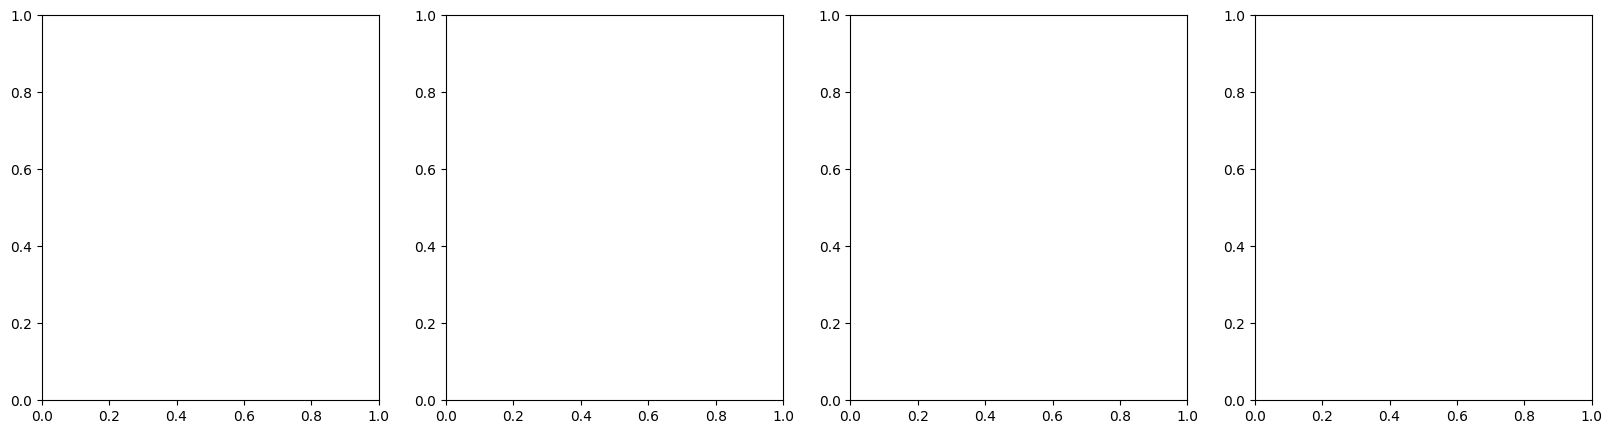

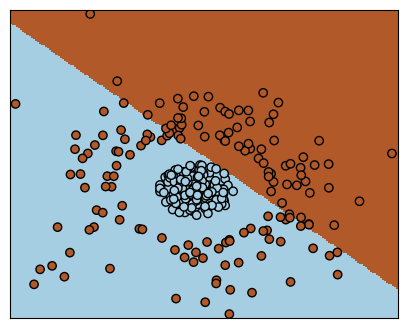

(200, 200) (200, 200) (200, 200)


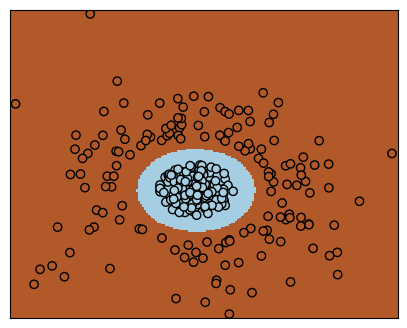

(200, 200) (200, 200) (200, 200)


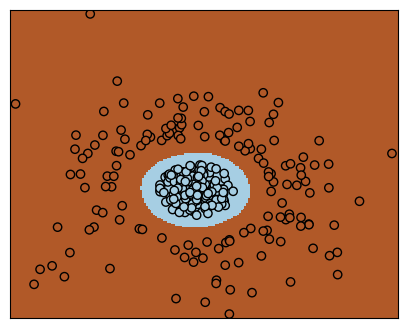

(200, 200) (200, 200) (200, 200)


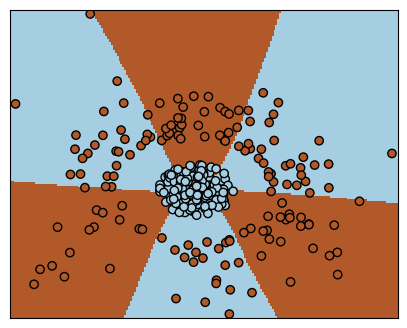

In [45]:

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
#El 4 representa el número de kernels
_, ax = plt.subplots(1,4, figsize = (20,5))

# fit the model
for kernel in kernels :
    #
    clf = SVC(kernel = kernel , gamma = 1, degree = 2)
    clf.fit( X , y  )

    plot_decision_boundary(clf, X, y, 200, y, 5,4 )
    plt.show()

 #   x_min, x_max = _ , _
  #  y_min, y_max = _ , _

   # x_dim, y_dim = np.meshgrid(np.arange( _ , _ , 0.01), np.arange( _ , _ , 0.01))
    #predictions = clf.predict(np.c_[x_dim.ravel(), y_dim.ravel()])

    #predictions = predictions.reshape( _ )
    #axes[i].pcolormesh( _ , _ , predictions, cmap = plt.cm.Paired)
    #axes[i].contour( _ , _ , predictions, colors=['k', 'k'], linestyles=['-', '-'], levels=[0, 1])

    #axes[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 90, facecolors = 'none', edgecolors = 'k')

    #axes[i].scatter( _ , _ , c = _ , cmap=plt.cm.Paired, edgecolors='k')
    #axes[i].set_axis_off()

#plt.show()

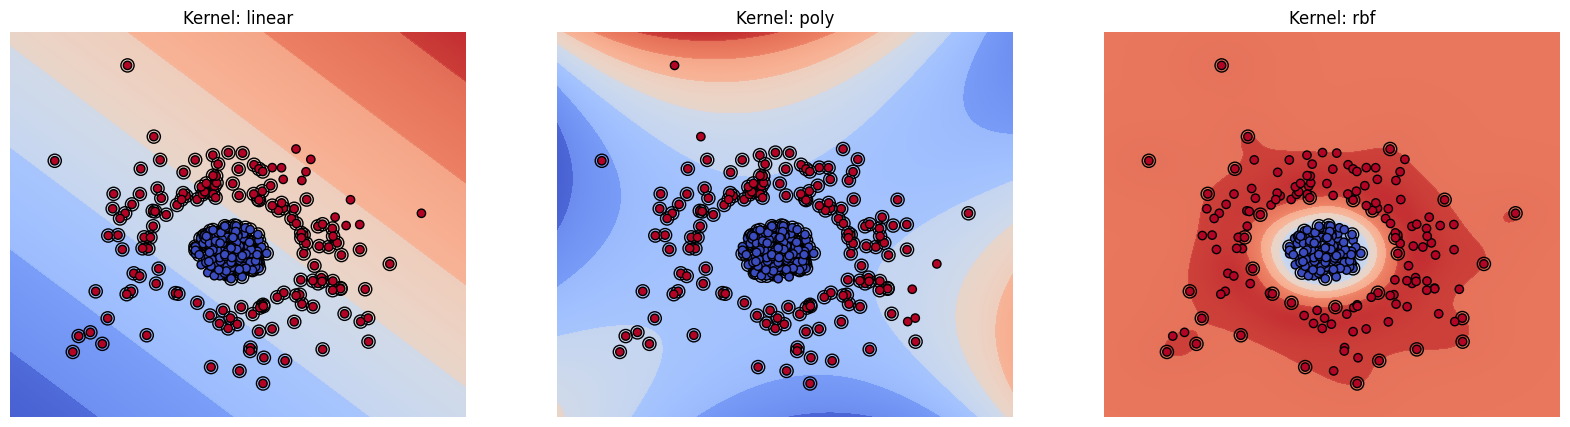

In [46]:

kernels = ['linear', 'poly', 'rbf']

_, axes = plt.subplots(1, 3, figsize=(20, 5))

# Ajustar el modelo
for i, kernel in enumerate(kernels):
    clf = SVC(kernel=kernel, gamma=1)
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    x_dim, y_dim = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    predictions = clf.decision_function(np.c_[x_dim.ravel(), y_dim.ravel()])

    predictions = predictions.reshape(x_dim.shape)
    axes[i].pcolormesh(x_dim, y_dim, predictions, cmap=plt.cm.coolwarm, shading='auto')
    axes[i].contourf(x_dim, y_dim, predictions, alpha=0.75, cmap=plt.cm.coolwarm)

    axes[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=90, facecolors='none', edgecolors='k')

    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    axes[i].set_axis_off()
    axes[i].set_title(f'Kernel: {kernel}')

plt.show()

Create a function that plots the decision boundaries of a given SVM

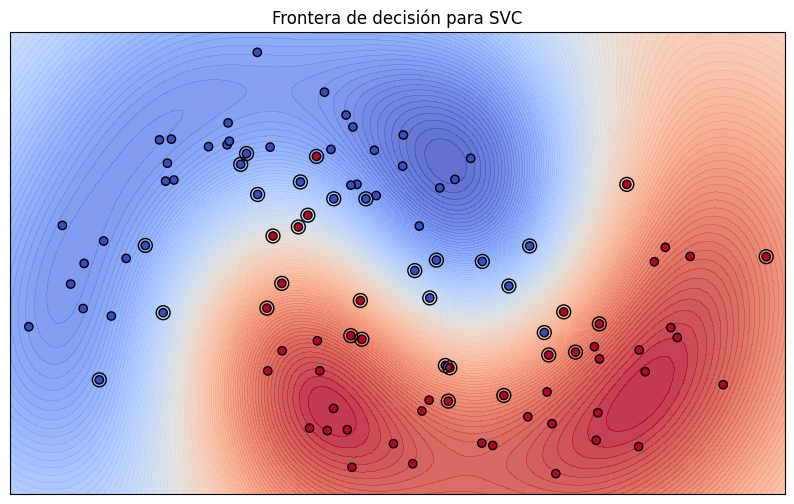

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def plot_svm_decision_boundary(modelo, X, y, NValue=100, ancho=10, largo=6):
    h_min, h_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    v_min, v_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # Cuadrícula
    h_grid, v_grid = np.meshgrid(np.linspace(h_min, h_max, NValue), np.linspace(v_min, v_max, NValue))

    # Calcular predicciones
    pred_grid = modelo.decision_function(np.c_[h_grid.ravel(), v_grid.ravel()])

    # Reshape predicción
    pred_grid = pred_grid.reshape(h_grid.shape)

    # Crear figura y ejes
    plt.figure(figsize=(ancho, largo))
    plt.contourf(h_grid, v_grid, pred_grid, levels=np.linspace(pred_grid.min(), pred_grid.max(), 100), cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.scatter(modelo.support_vectors_[:, 0], modelo.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Frontera de decisión para {type(modelo).__name__}')
    plt.show()

# Ejemplo de uso
from sklearn import datasets
from sklearn.svm import SVC

# Generar datos
X, y = datasets.make_moons(n_samples=100, noise=0.2, random_state=42)

# Crear y entrenar el modelo SVM
modelo_svm = SVC(kernel='rbf', gamma=1)
modelo_svm.fit(X, y)

# Graficar la frontera de decisión
plot_svm_decision_boundary(modelo_svm, X, y)


## In real data

Evaluate the different SVM kernels in the Iris and Fruits datasets

Evaluación de SVM en el dataset de Iris

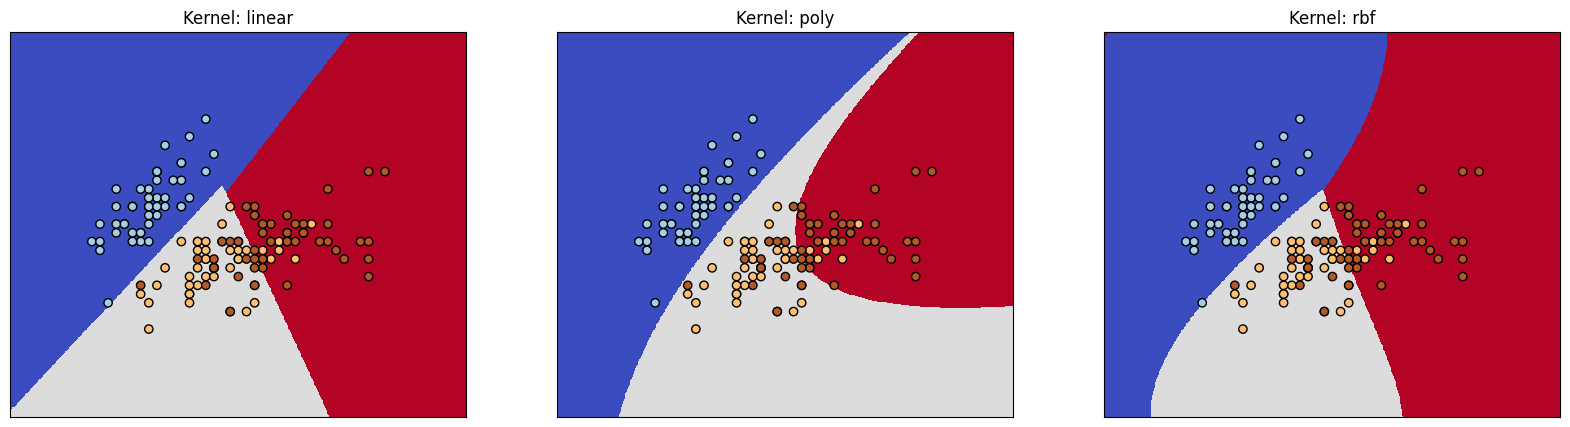

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Cargar el dataset de Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Usamos solo las dos primeras características para facilitar la visualización
y = iris.target

kernels = ['linear', 'poly', 'rbf']

_, axes = plt.subplots(1, 3, figsize=(20, 5))

# Ajustar el modelo y graficar las fronteras de decisión
for i, kernel in enumerate(kernels):
    clf = SVC(kernel=kernel, gamma='auto')
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    x_dim, y_dim = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    predictions = clf.predict(np.c_[x_dim.ravel(), y_dim.ravel()])

    predictions = predictions.reshape(x_dim.shape)
    axes[i].pcolormesh(x_dim, y_dim, predictions, cmap=plt.cm.coolwarm, shading='auto')
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap='Paired', edgecolors='k')
    axes[i].set_title(f'Kernel: {kernel}')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

plt.show()


Evaluación de SVM en el dataset de Fruits

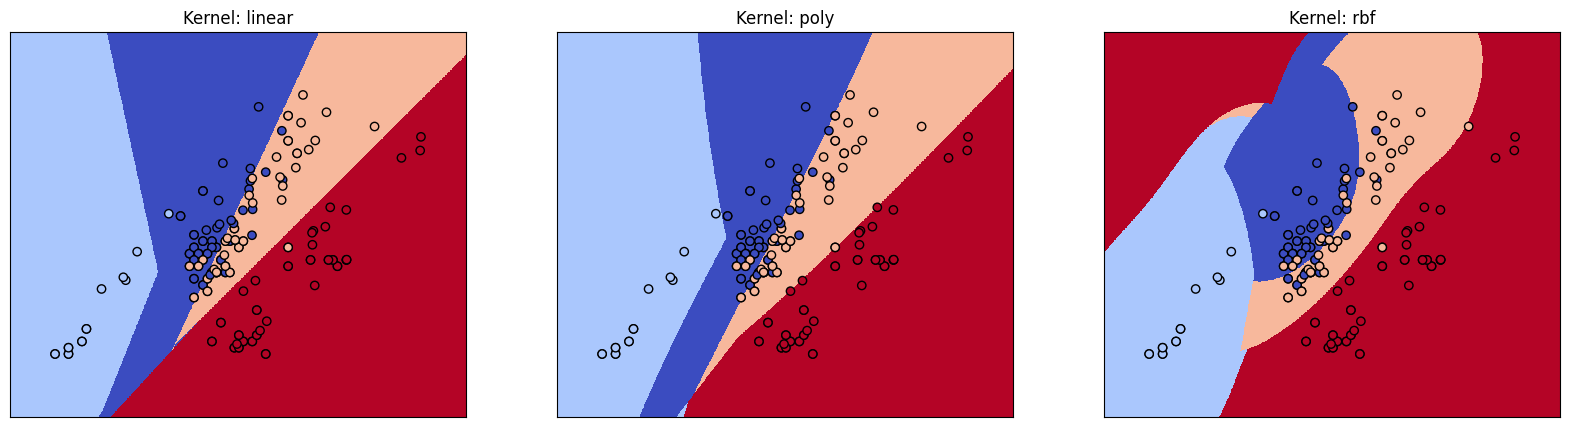

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Cargar el dataset de Fruits
fruit_data = pd.read_csv('/content/drive/MyDrive/Machine/Trabajos _de _clase/KNN/fruits_data_ext.csv')

# Seleccionar características y etiquetas
X = fruit_data[['height', 'width']].values  # Ajusta las columnas según tu dataset
y = fruit_data['fruit_label'].values

kernels = ['linear', 'poly', 'rbf']

_, axes = plt.subplots(1, 3, figsize=(20, 5))

# Ajustar el modelo y graficar las fronteras de decisión
for i, kernel in enumerate(kernels):
    clf = SVC(kernel=kernel, gamma='auto')
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    x_dim, y_dim = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    predictions = clf.predict(np.c_[x_dim.ravel(), y_dim.ravel()])

    predictions = predictions.reshape(x_dim.shape)
    axes[i].pcolormesh(x_dim, y_dim, predictions, cmap=plt.cm.coolwarm, shading='auto')
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    axes[i].set_title(f'Kernel: {kernel}')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

plt.show()

